In [1]:
# SAVING DATA TO FILE
save_to="C:\\Users\\User\\Documents\\Exp_data\\biphotons\\"+\
        "data_%s.npy"%time.strftime('%Y-%m-%d_%H-%M')
np.save(save_to,readings)
print ("saved to %s"%save_to)

NameError: name 'time' is not defined

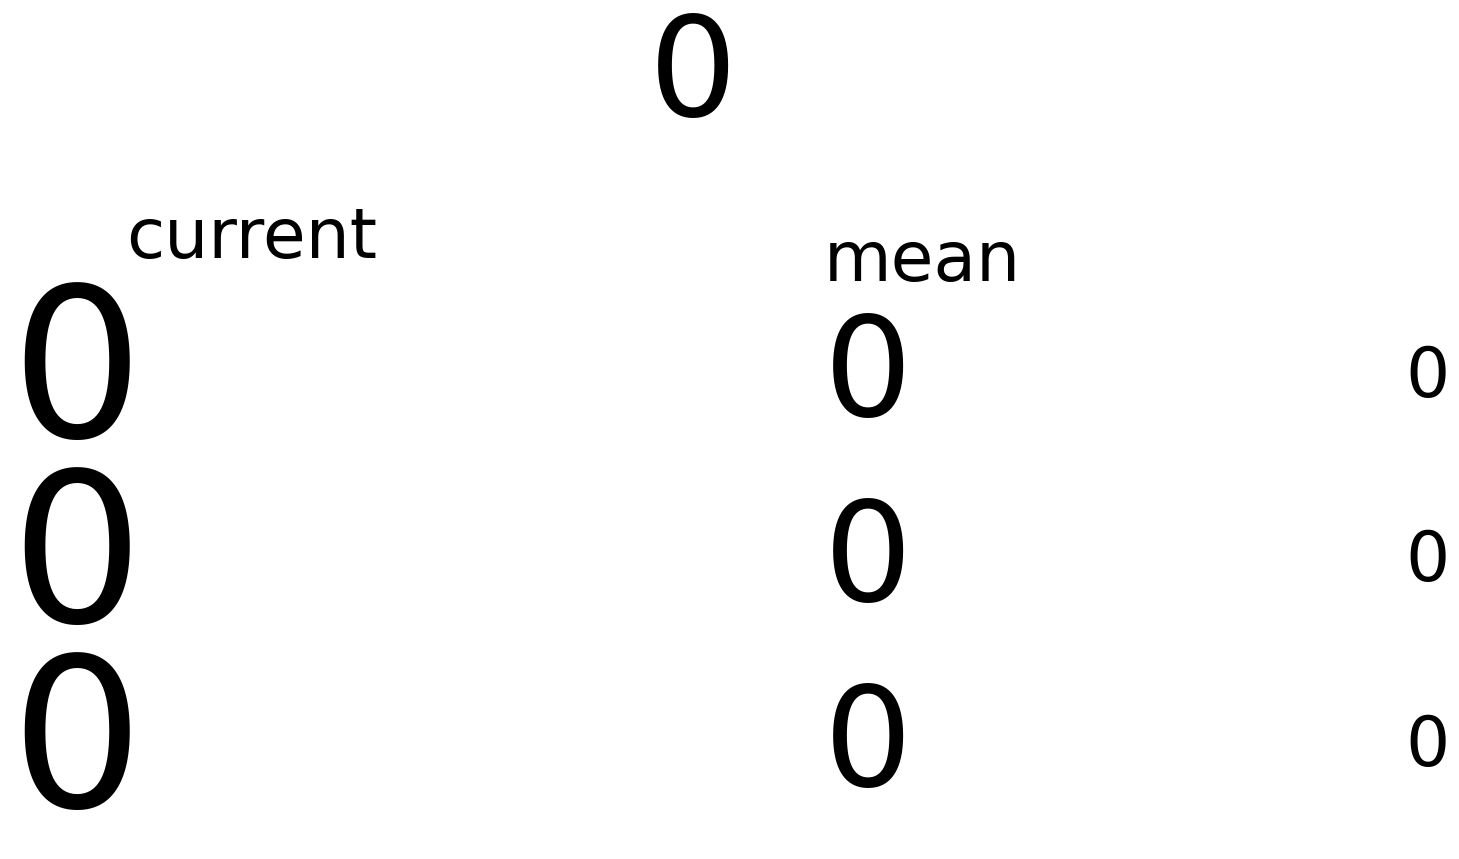

'20:17:53'

KeyboardInterrupt: 

In [1]:
#INITIALIZATION
import numpy as np
import serial, time
import matplotlib.pyplot as plt
from IPython import display
from datetime import timedelta
%matplotlib inline

def qe(N_1, N_2, N_C):
    if N_C == 0 or N_1 == 0:
        return 0
    n_1 = N_1 / N_C                              
    n_2 = N_2 / N_C
    R = 0.60
    T = 0.4
    lose = 0.3
    qe_1 = int(2 * ( 2 * n_1 - 1) / ((4 * n_1 * n_2  - 1) * R) / 0.37 * 100) 
    qe_2 = int(2 * ( 2 * n_2 - 1) / ((4 * n_1 * n_2  - 1) * T) / 0.47 * 100)
    return qe_1, qe_2, 

#COM Port initialization
try:
    s = serial.Serial('COM25',115200)
except IOError: 
    pass
   
#reset input buffer
s.reset_input_buffer()
s.readline()
s.reset_input_buffer()
readings = [[],[],[]]
    
while True:

    raw_reading = s.readline().decode(errors='ignore')
    reading = [int(part.strip()) for part in raw_reading.split('\t')]        
    for k in range(3):
        readings[k].append(reading[k])
        
    display.clear_output(wait=True)
    f, ax = plt.subplots(figsize=(15,0.3))
    ax.axis("off")
    ax.text(0.05, 25, 'current', transform=ax.transAxes, fontsize=50,
        verticalalignment='bottom')
    ax.text(0.65, 24, 'mean', transform=ax.transAxes, fontsize=50,
        verticalalignment='bottom')
    ax.text(-0.05, 0, reading[0], transform=ax.transAxes, fontsize=150,
        verticalalignment='bottom')
    ax.text(-0.05, 8, reading[1], transform=ax.transAxes, fontsize=150,
        verticalalignment='bottom')
    ax.text(-0.05, 16, reading[2], transform=ax.transAxes, fontsize=150,
        verticalalignment='bottom')
    ax.text(0.65, 1.5, int(np.mean(readings[0][-10:])), transform=ax.transAxes, fontsize=100,
        verticalalignment='bottom')
    ax.text(0.65, 9.5, int(np.mean(readings[1][-10:])), transform=ax.transAxes, fontsize=100,
        verticalalignment='bottom')
    ax.text(0.65, 17.5, int(np.mean(readings[2][-10:])), transform=ax.transAxes, fontsize=100,
        verticalalignment='bottom')
    ax.text(1.15, 3, int(np.std(readings[0][-10:])), transform=ax.transAxes, fontsize=50, 
        verticalalignment='bottom')
    ax.text(1.15, 11, int(np.std(readings[1][-10:])), transform=ax.transAxes, fontsize=50,
        verticalalignment='bottom')
    ax.text(1.15, 19, int(np.std(readings[2][-10:])), transform=ax.transAxes, fontsize=50,
        verticalalignment='bottom')
    ax.text(0.50, 30.5, qe(int(np.mean(readings[0][-10:])), int(np.mean(readings[1][-10:])), int(np.mean(readings[2][-10:]))), transform=ax.transAxes, fontsize=100,
        verticalalignment='bottom')
    #display.display(plt.show())
    plt.show()
    display.display(time.strftime('%H:%M:%S'))
    #print(qe(int(np.mean(readings[0][-10:])), int(np.mean(readings[1][-10:])), int(np.mean(readings[2][-10:]))))

In [3]:
s.close()